
Dezhong Shen 

This dataset is about a daily activiy of Airbnb in Boxton with some numberic and text attributes. The listing part shows that a full description of each house and view score.

## Data pre-processing and understanding

### a. Load the data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("listings.csv")
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


### b. Explore the data. Plot the distribution of the attributes (frequency). 

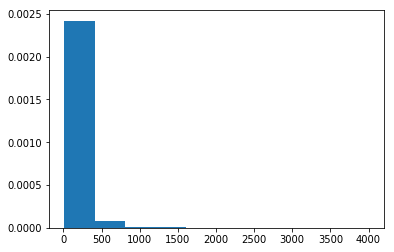

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
price = data.price
i=0
list=[]
for i in range(i,len(data.price)):
    if '$' in data.price[i]:
        tem=data.price[i].replace('$','')
        if ',' in data.price[i]:
            list.append(float(tem.replace(',','')))
        else:
            list.append(float(tem))
    else:
        list.append(float(data.price[i]))
plt.hist(list,density=True)      #use this to draw histogram of your data
plt.show()

In [22]:
data['price'].head()


0    250
1     65
2     65
3     75
4     79
Name: price, dtype: int64

we can use the columns of price to predict the airbnb price by using supervied learning.For columns such as has_availability or jurisdiction_names which missing values rate is very high the we could ingore this type of data.

In [23]:
data = data.drop_duplicates()
data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,f,NaN,NaN,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,9.0,f,NaN,NaN,f,strict,f,f,2,1.01


In [24]:
import seaborn as sns
prices = data['price']

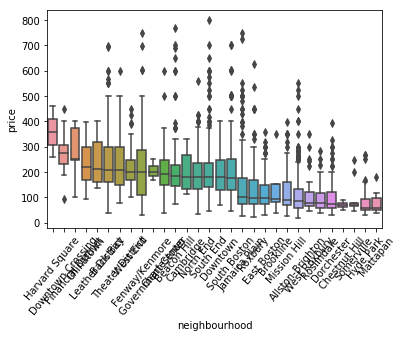

In [25]:
sorder = data.query('price <= 800')\
            .groupby('neighbourhood')['price']\
            .median()\
            .sort_values(ascending=False)\
            .index
sns.boxplot(x='neighbourhood',y='price', data=data.query('price <= 800'), 
            order=sorder)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
plt.show()

We can see, Harvard Square has the highest average rating.

##  Build the model that forecasts the price of a listing using the attributes location, listing type, selected host properties, distance from the centre , and any other available attribute (excluding free text attributes such as descriptions, reviews)

 use liner regrassion to predict the price which is a supervised learning problem.

The way to evaluate the model: 
(1). Mean Absolute Error, which is the mean of the absolute value of the errors.
(2). Mean Squared Error, which is the mean of the squared errors.
(3). Root Mean Squared Error, which is the square root of the mean of the squared errors.

I will use k-fold cross validation to prevent the overfit problem.

### Build  model and verify how it performs in the training data. 

For this part I use linear regrassion to predict the price. I use k-fold cross-validation to test the model which is better to sample validation.

In [29]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
## deal with miss values
data=data.fillna(0)
cols= [col for col in data.columns if col in ['beds','square_feet','bedrooms','bathrooms','review_scores_location','review_scores_communication','review_scores_cleanliness']]
X=data[cols].values
y=list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = LinearRegression()
clf.fit(X_train, y_train) 
pre=clf.predict(X_test)
scores = cross_val_score(clf, X_test, pre, cv=15)
scores.mean()


1.0

###  Test  model in the testing set and evaluate its performance.

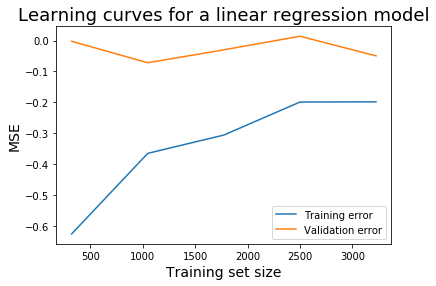

In [30]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,X = X,y = y,cv= 10)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18)
plt.legend()

I use rigdge liner regrassion which is using L2 regularization to prevent overfitting problems.

In [31]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.02)
clf.fit(X, y) 
pre=clf.predict(X_test)
scores = cross_val_score(clf, X_test, pre, cv=15)
scores.mean()

0.9999999992928511

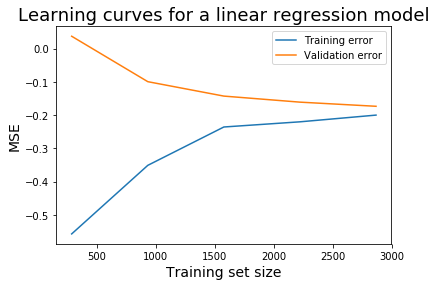

In [32]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,X = X,y = y,cv= 5)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18)
plt.legend()

## Reference

https://www.dataquest.io/blog/learning-curves-machine-learning/
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge